# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré-Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual, no início da primeira aula.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Exibe todas as expressões da célula
import kaleido
pio.renderers.default = "png" # A maioria dos gráficos são interativos, isso faz com que eles deixem de ser interativos mas apareçam no preview.

In [28]:
caminho = r'.\CHURN_TELECON_MOD15'

if os.path.exists(caminho):
    print('Arquivo encontrado!')
else:
    print('Arquivo não encontrado.')

df = pd.read_csv(caminho)
df.head(10)

Arquivo encontrado!


,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Método_pagamento,Pagamento_Mensal,Total_Pago,Churn
0,FEMALE,False,True,False,1,No,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,29.850000,29.85,No
1,MALE,False,False,False,34,Yes,DSL,YES,NO,NO,ONE YEAR,MAILED CHECK,56.950000,1889.50,No
2,MALE,False,False,False,2,Yes,DSL,YES,NO,NO,MONTH-TO-MONTH,MAILED CHECK,53.850000,108.15,Yes
3,MALE,False,False,False,45,No,DSL,YES,YES,NO,ONE YEAR,BANK TRANSFER (AUTOMATIC),40.269444,1840.75,No
4,FEMALE,False,False,False,52,Yes,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,ONE YEAR,MAILED CHECK,21.220856,1022.95,No
5,MALE,False,False,True,71,Yes,FIBER OPTIC,YES,NO,YES,TWO YEAR,BANK TRANSFER (AUTOMATIC),91.772642,7382.25,No
6,FEMALE,False,True,True,10,Yes,DSL,NO,YES,NO,MONTH-TO-MONTH,CREDIT CARD (AUTOMATIC),64.370870,528.35,Yes
7,FEMALE,False,False,False,21,Yes,FIBER OPTIC,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,91.772642,1862.90,No
8,MALE,True,False,False,1,No,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,40.269444,39.65,Yes
9,MALE,False,True,False,12,Yes,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,ONE YEAR,BANK TRANSFER (AUTOMATIC),21.220856,202.25,No


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plote gráficos que considerar importantes para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

A) Resposta:

In [ ]:
# A)
df.describe()
# A princípio não há fortes indícios de outliers, na coluna de pagamento mensal. Mas a coluna de tempo como cliente (por ter seu mínimo como 0 e seu 25% um valor bem baixo comparado ao seu 50%) e a coluna total pago (por ter a média bem diferente do seu 50%) mostram que uma análise mais aprofundada é recomendada.
df.info()

,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000
mean,32.352090,65.516430,2290.087178
std,24.636885,28.772373,2264.585643
min,0.000000,18.400000,18.800000
25%,8.000000,44.300000,402.337500
50%,29.000000,69.350000,1402.900000
75%,56.000000,89.850000,3867.162500
max,72.000000,118.650000,8564.750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genero              2488 non-null   object 
 1   Idoso               2488 non-null   bool   
 2   Casado              2488 non-null   bool   
 3   Dependentes         2488 non-null   bool   
 4   Tempo_como_Cliente  2488 non-null   int64  
 5   Servico_Telefone    2488 non-null   object 
 6   Servico_Internet    2488 non-null   object 
 7   Servico_Seguranca   2488 non-null   object 
 8   Suporte_Tecnico     2488 non-null   object 
 9   StreamingTV         2488 non-null   object 
 10  Tipo_Contrato       2488 non-null   object 
 11  Método_pagamento    2488 non-null   object 
 12  Pagamento_Mensal    2488 non-null   float64
 13  Total_Pago          2488 non-null   float64
 14  Churn               2488 non-null   object 
dtypes: bool(3), float64(2), int64(1), object(9)
memory usag

B) Resposta:


Com base no describe, aparentemente pode ser possível a existência de outliers na coluna Total Pago, pela média ser bem diferente da mediana, já que no caso, a mediana é metade da média, ou seja, é provável que tenham outliers com valores muito acima. E o tempo_como_cliente indica que é importante fazer análises para verificar, visto que o min é 0, e o 25% é bem baixo comparado à média, todavia deve ser tratada com cautela já que um valor baixo não significa necessariamente que é um outlier, pode ser um caso real, logo uma análise mais aprofundada se faz necessária. Vale ressaltar que, se faz necessário tratamento de qualquer cliente que tivesse, ao mesmo tempo, 0 na coluna tempo_como_cliente, e o valor Total pago ser maior que o valor de pagamento mensal, visto que, nesse caso, o cliente teria que ter ao menos 1 mês.

C) Resposta:

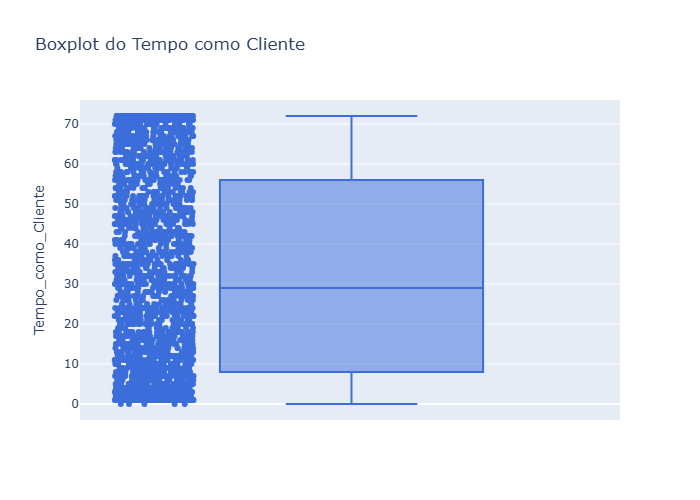

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Método_pagamento,Pagamento_Mensal,Total_Pago,Churn
476,FEMALE,False,True,True,0,No,DSL,YES,YES,YES,TWO YEAR,BANK TRANSFER (AUTOMATIC),52.55,52.55,No
741,MALE,False,False,True,0,Yes,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,TWO YEAR,MAILED CHECK,20.25,40.50,No
924,FEMALE,False,True,True,0,Yes,DSL,YES,NO,YES,TWO YEAR,MAILED CHECK,80.85,80.85,No
1070,MALE,False,True,True,0,Yes,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,TWO YEAR,MAILED CHECK,25.75,25.75,No
1328,FEMALE,False,True,True,0,No,DSL,YES,YES,YES,TWO YEAR,CREDIT CARD (AUTOMATIC),56.05,56.05,No


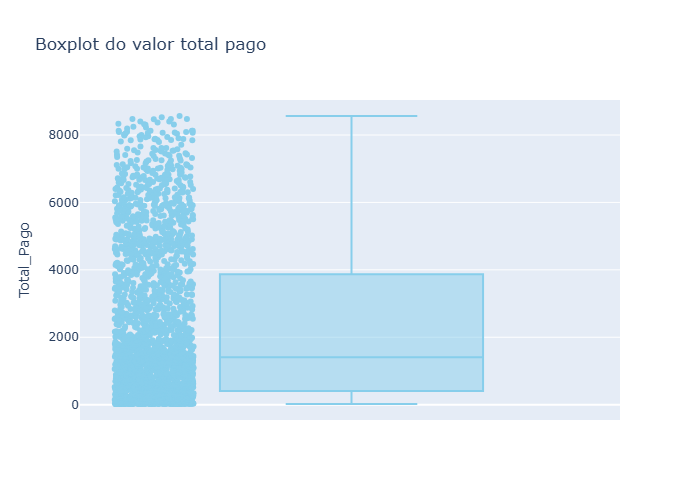

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Método_pagamento,Pagamento_Mensal,Total_Pago,Churn
2175,MALE,False,True,False,71,Yes,FIBER OPTIC,YES,YES,YES,TWO YEAR,ELECTRONIC CHECK,116.25,8564.75,No
2356,FEMALE,False,True,False,72,Yes,FIBER OPTIC,YES,YES,YES,TWO YEAR,CREDIT CARD (AUTOMATIC),117.15,8529.50,No


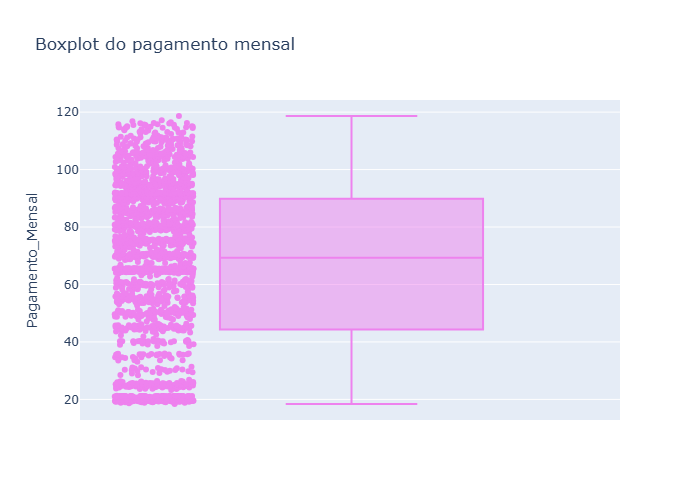

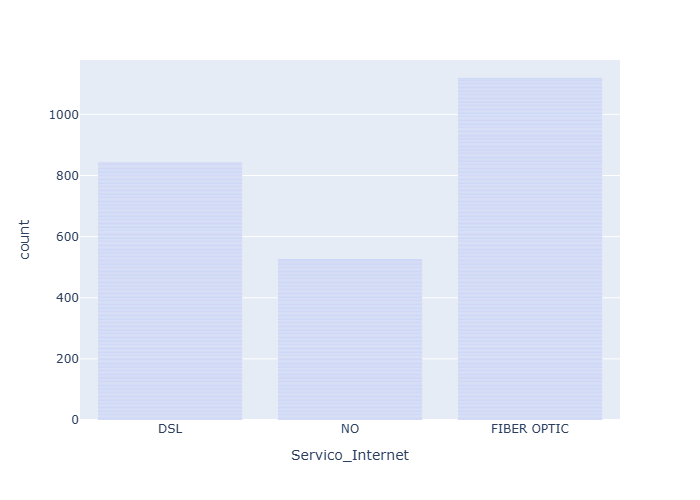

In [5]:
px.box(
    df,
    y='Tempo_como_Cliente',  # Nome correto da coluna no seu CSV
    color_discrete_sequence=["#3C6EDB"],  # Cor personalizada (opcional)
    title='Boxplot do Tempo como Cliente',
    points='all'
)

df[df['Tempo_como_Cliente'] == 0]

# Após a análise do grafico presume-se que o min, 0, não é um problema já que ela pode ter contrado o serviço e não ter completado o primeiro mês ainda. 

px.box(
    df,
    y='Total_Pago',
    color_discrete_sequence=['skyblue'],
    title='Boxplot do valor total pago',
    points='all'
)

df[df['Total_Pago'] >= 8496]

# Inicialmente é fácil pensar que existem muitos outliers, ainda mais que a média de pagamento mensal é 65 e o máximo pago mensalmente é 118, no gráfico de tempo como cliente vimos que o máximo que alguém foi cliente é 72 meses logo, se multiplicarmos, utilizando as condições mais caras possíveis, 118 x 72 o valor seria, 8496, qualquer valor acima realmente poderia ser considerado um outlier (Porém o cliente poderia ter pago o valor do serviço mas não ter terminado o mês ainda, mesmo caso do Tempo como cliente),  mas de acordo com o gráfico fica vísivel que muito dos valores altos são possíveis, Ainda mais que pela quantidade de linhas e ausência de valores nulos, logo, 25% de linhas de uma coluna, representa a mesma quantidade de linhas de outra, fazendo com que os dispariedade de valores, fosse extremamente possível nas condições corretas(Usar uma quantidade maior de serviços por exemplo.)

px.box(
    df,
    y='Pagamento_Mensal',
    color_discrete_sequence=['Violet'],
    title='Boxplot do pagamento mensal',
    points='all'
)

# Esse gráfico de pagamento mensal não indica a presença de outliers, mas é importante pois pode indicar quais serviços as pessoas utilizam, por causa do pulo entre o mínimo e o 25%, ou seja, nessa aréa devem estar as pessoas que utilizam somente o serviço de internet ou de telefone.

px.bar(
    df,
    'Servico_Internet'
)
# Esse gráfico mostra principalmente a distribuição utilizada pelos clientes entre os serviços de internet, e pode ser muito útil telo como base para quando for feita uma análise bivariada utilizando churn e serviço de internet visando descobrir se algum grupo específico tem uma tendência maior a dar churn.

D) Resposta:

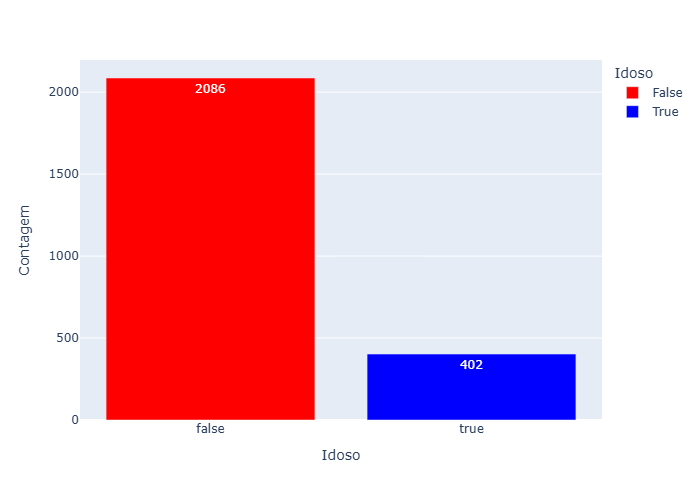

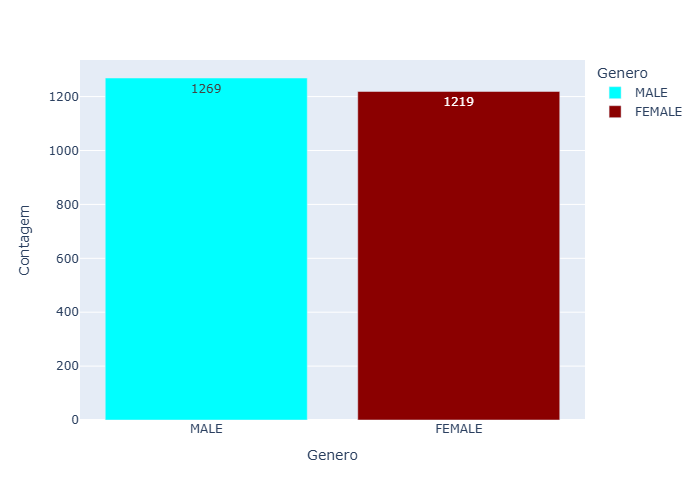

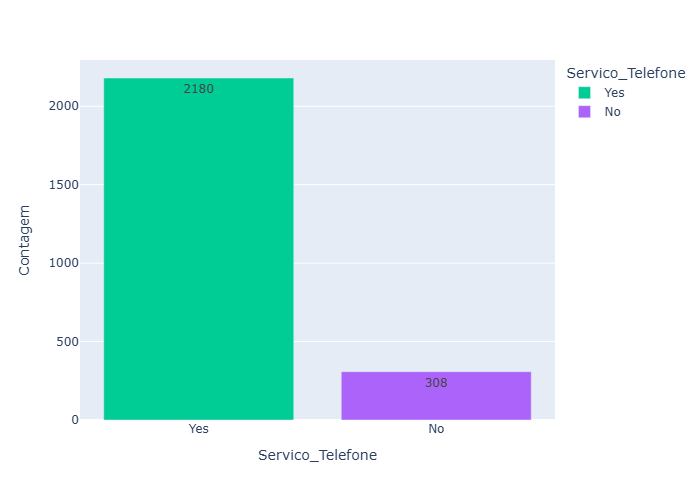

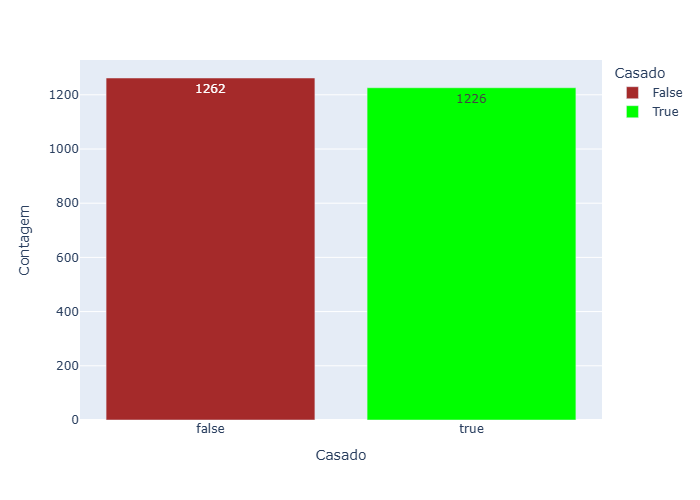

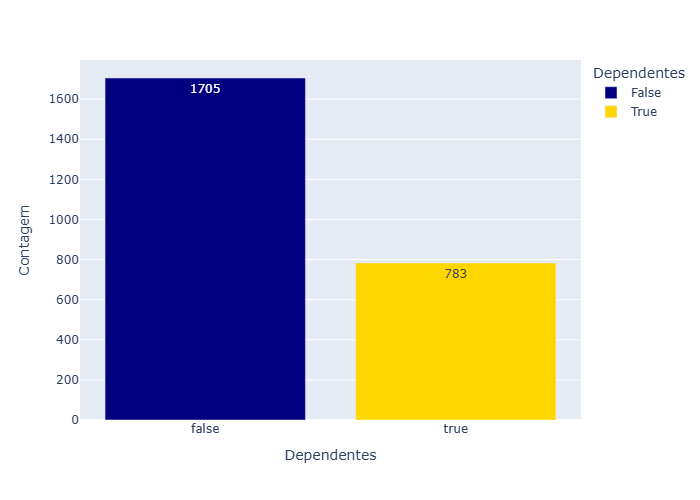

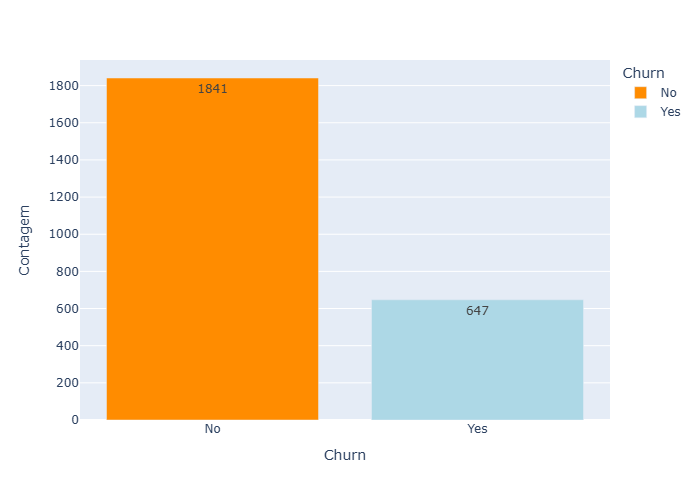

In [6]:
# Aqui colequei algumas bool, mas coloquei alguns para me ajudar com a análise geral do gráfico.

# Idosos

contagem_idoso = df['Idoso'].value_counts().reset_index()
contagem_idoso.columns = ['Idoso', 'Contagem']

px.bar(
    contagem_idoso,
    x='Idoso',
    y='Contagem',
    color='Idoso',
    color_discrete_map={False: 'red', True: 'blue'},
    text='Contagem'  # Mostra o número em cima da barra
)

# Não é balaceado, indicando que os idosos não utilizam muito a marca.

# Genero

contagem_Genero = df['Genero'].value_counts().reset_index()
contagem_Genero.columns = ['Genero', 'Contagem']

px.bar(
    contagem_Genero,
    x='Genero',
    y='Contagem',
    color='Genero',
    color_discrete_map={'MALE': 'cyan', 'FEMALE': 'darkred'},
    text='Contagem'  # Mostra o número em cima da barra
)

# Bem distribuído, aparentemente a empresa não é mais famosa entre nenhum genero específico.

# Serviço de telefone

contagem_Telefone = df['Servico_Telefone'].value_counts().reset_index()
contagem_Telefone.columns = ['Servico_Telefone', 'Contagem']

px.bar(
    contagem_Telefone,
    x='Servico_Telefone',
    y='Contagem',
    color='Servico_Telefone',
    color_discrete_map={False: 'magenta', True: 'darkgreen'},
    text='Contagem'
)

# Não é balanceado, mas de um forma positiva já que a maioria dos clientes utilizam serviço de telefone

# Casados

contagem_Casado = df['Casado'].value_counts().reset_index()
contagem_Casado.columns = ['Casado', 'Contagem']

px.bar(
    contagem_Casado,
    x='Casado',
    y='Contagem',
    color='Casado',
    color_discrete_map={False: 'brown', True: 'lime'},
    text='Contagem' 
)

# Até agora foi o mais balanceado já que a distribuição dos clientes é bem parecida, tendo muitos casados e muitos que não são.

# Tem dependentes

contagem_Dependentes = df['Dependentes'].value_counts().reset_index()
contagem_Dependentes.columns = ['Dependentes', 'Contagem']

px.bar(
    contagem_Dependentes,
    x='Dependentes',
    y='Contagem',
    color='Dependentes',
    color_discrete_map={False: 'navy', True: 'gold'},
    text='Contagem' 
)

# Não é balanceados, a maioria não tem dependentes.

# Taxa de Churn

contagem_Churn = df['Churn'].value_counts().reset_index()
contagem_Churn.columns = ['Churn', 'Contagem']

px.bar(
    contagem_Churn,
    x='Churn',
    y='Contagem',
    color='Churn',
    color_discrete_map={'No': 'darkorange', 'Yes': 'lightblue'},
    text='Contagem' 
)

# Não é balanceado mas também em um sentido positivo vistos que a maioria dos clientes não deram churn.

# 3) Identifique e trate as colunas que contêm outliers.
Caso opte por mantê-los ou alterá-los justifique sua escolha.


In [ ]:
# Não encontrei nenhum outlier. Pelo IQR não mostrou nada alarmante, então fiz apenas correção de um caso (Nesse caso, o pagamento total era o dobro do pagamento mensal e o cliente tinha 0 como tempo como cliente, logo estava errado e a pessoa provavelmente tinha 1), correção pequena, mas muitos dos casos são extremamente possíveis e indicam lógica, por exemplo o total pago que tem um valor maior, paga, é cliente há bastante tempo e utiliza muitos serviços. Logo, mudar ou retirar, é arriscado demais, poderia atrapalhar mais do que ajudar o modelo de machine learning, e não seguiria uma lógica justa.

df.loc[741, 'Tempo_como_Cliente'] = 1 

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projeto relacionadas à variável Churn?

A) Resposta:

Questionamentos:

- Existe alguma relação evidente entre gênero e dar Churn?

- Algo indica que idade aumenta as chances da decisão de dar churn ou não?

- Existe alguma indicação que mostra que o motivo do churn pode ser o serviço de internet?

- Pagar mais ou menos mensalmente faz com que tenha mais chance ou menos chance de dar churn?

- Clientes mais novos ou mais antigos têm mais chance de dar churn? 

1. Existe alguma relação evidente entre gênero e dar Churn?

Resposta: Como foi visto anteriormente, gênero é uma coluna bem distribuída e em comparação a taxa de churn é desbalanceada mas igualmente desbalanceada, ou seja, não há nenhuma relação evidente entre gênero e dar churn.

Churn,No,Yes
Genero,,
FEMALE,0.727646,0.272354
MALE,0.751773,0.248227


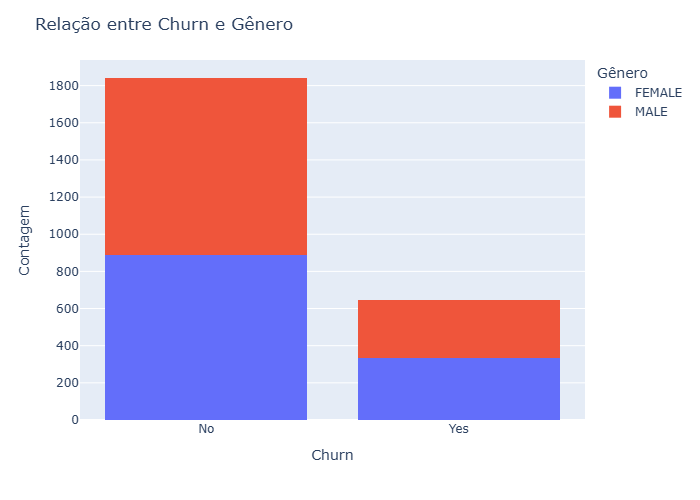

In [15]:
pd.crosstab(df['Genero'], df['Churn'], normalize="index") # Primeiro fiz um cross tab simples, visando ver a porcentagem, não indicou nada a princípio.

fig = px.histogram(df, x='Churn', color='Genero', barmode='stack') # Gráfico

fig.update_layout(title='Relação entre Churn e Gênero',  
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Gênero'
) # Pequena estlização

2. Algo indica que idade aumenta as chances da decisão de dar churn ou não?

Resposta: O gráfico não deixa isso muito claro, mas a crosstab por outro lado mostra que sim, pessoas idosas têm uma tendência maior a dar churn do que as pessoas mais novas, ainda mais levando em consideração que a quantidade de clientes idosos é bem menor do que a de não idosos. Ou seja, para diminuirmos a taxa de churn, é importante garantir que os serviços oferecidos são customer friendly, acessíveis e intuitivos, além de campanhas de marketing para grupos mais idosos também pode ser uma boa estratégia... Respondendo o questionamento, sim, já que a porcentagem de idosos que deixam a empresa é maior do que a de não idosos.

Churn,No,Yes
Idoso,,
False,0.764621,0.235379
True,0.611940,0.388060


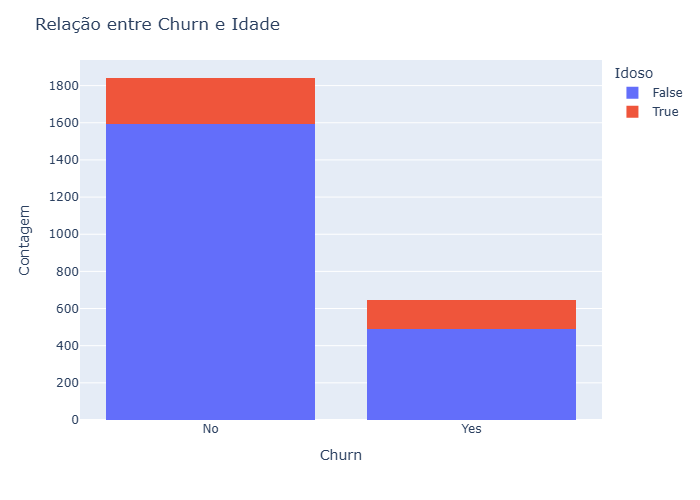

In [16]:
pd.crosstab(df['Idoso'], df['Churn'], normalize='index') # Crosstab

fig = px.histogram(df, x='Churn', color='Idoso', barmode='stack') # Gráfico

fig.update_layout(title='Relação entre Churn e Idade',  
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Idoso'
) # estlização

3. Existe alguma indicação que mostra que o motivo do churn pode ser o serviço de internet?

Resposta: É possível que sim, visto que a maior parte dos clientes que utilizam Fibra óptica deram churn, seria interessante verificar a qualidade e o preço de tal comparado à concorrentes, mas comparado aos outros serviços de internet, os que usam Fibra óptica têm muito mais chance de dar churn.

Servico_Internet,DSL,FIBER OPTIC,NO
Churn,,,
No,0.378599,0.352526,0.268876
Yes,0.224111,0.726430,0.049459


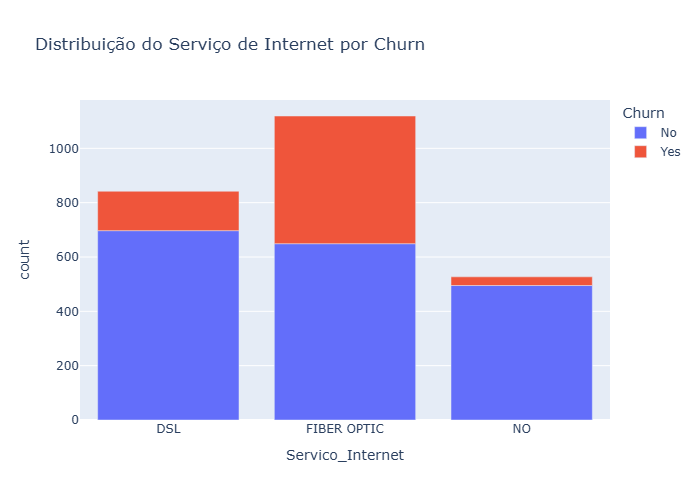

In [17]:
pd.crosstab(df['Churn'], df['Servico_Internet'], normalize='index') # Crosstab para ter uma visualização rápida!

# Utilizando groupby para ter a quantidade exata de valores.
df_Servico = df.groupby('Servico_Internet')['Churn'].value_counts().reset_index(name='count')

px.bar(
    df_Servico,
    x='Servico_Internet',
    y='count',
    color='Churn',
    barmode='relative', 
    title='Distribuição do Serviço de Internet por Churn'
)

4. Pagar mais ou menos mensalmente faz com que tenha mais chance ou menos chance de dar churn?

Resposta: Após a análise, fica evidente que o grupo dos 50% que gastam mais com a empresa mensalmente tem muito mais chance de dar churn do que o grupo que paga menos, todavia, não necessariamente, quanto mais paga, mais chance de sair, na verdade, o grupo que mais tem chance de dar churn são os clientes entre os 50-75% que pagam mais mensalmente.

Pagamento_Mensal
0–25%      0.109
25–50%     0.217
50–75%     0.371
75–100%    0.343
Name: Yes, dtype: float64


Text(0, 0.5, '% churn (Yes)')

Text(0.5, 0, 'Faixa de pagamento mensal')

Text(0.5, 1.0, 'Churn por quartil do pagamento mensal')

Text(0.0, 10.914927768860354, '10.9%')

Text(1.0, 21.70418006430868, '21.7%')

Text(2.0, 37.138263665594856, '37.1%')

Text(3.0, 34.29951690821256, '34.3%')

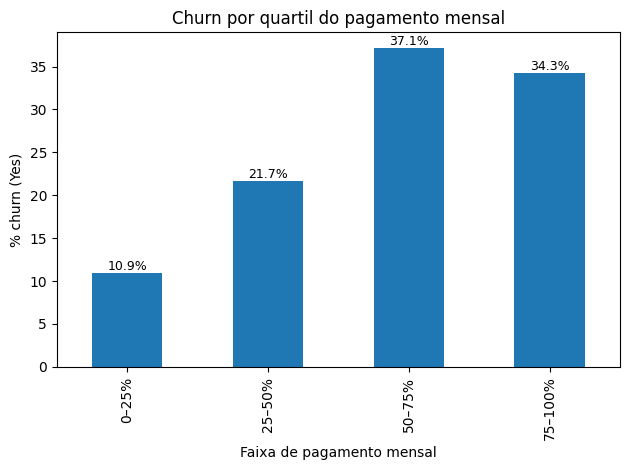

In [18]:
# Primeiro fiz a divisão dos quartis, colocando as ordens de quem paga menos para quem paga mais.

Divisao_Pag = pd.qcut(
    df["Pagamento_Mensal"], 
    q=[0, .25, .50, .75, 1.00],
    labels=["0–25%", "25–50%", "50–75%", "75–100%"],
    duplicates="drop"
)

# CrossTab, para verificar a distribuição, peguei com base no por cento das pessoas que deram churn para não precisar fazer alterações de tipo na coluna Churn.
porcento_mensal = pd.crosstab(Divisao_Pag, df["Churn"], normalize="index")
churn_por_faixa_mensal = porcento_mensal.get("Yes", 0).round(3)   # pega a coluna "Yes", ou seja, quem deu churn
print(churn_por_faixa_mensal)

# Peguei a porcentagem de yes. 
yes_porcento_mensal = (porcento_mensal.get("Yes", 0) * 100)

ax = yes_porcento_mensal.plot(kind="bar")
ax.set_ylabel("% churn (Yes)")
ax.set_xlabel("Faixa de pagamento mensal")
ax.set_title("Churn por quartil do pagamento mensal")

# rótulos nas barras (se sua versão do matplotlib suportar)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9)
plt.tight_layout(); plt.show()

5. Clientes mais novos ou mais antigos têm mais chance de dar churn?

Resposta: Com base na análise é evidente que clientes que estão há menos tempo com os serviços da empresa, ou seja, clientes mais novos na empresa, têm mais chance de dar churn. Ainda mais após visualizar o gráfico da distribuição dos quartis e ver que eles estão bem distribuídos e com quantidades próximas em cada quartil.

Tempo_como_Cliente
0–25%      0.483
25–50%     0.294
50–75%     0.172
75–100%    0.083
Name: Yes, dtype: float64


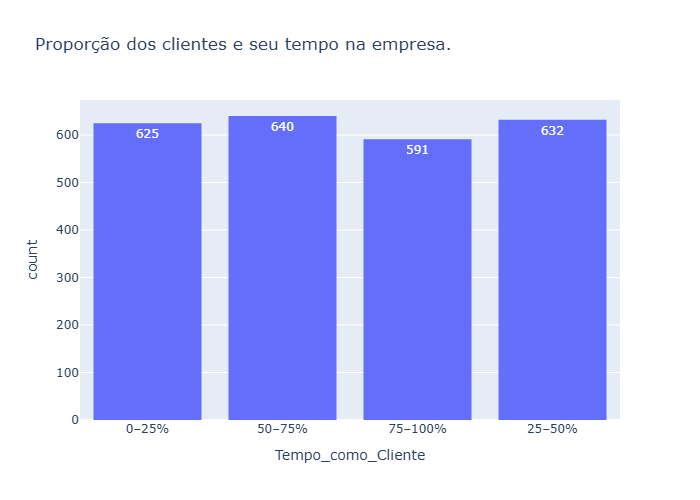

In [27]:
# Primeiro vou fazer a divisão do Tempo que os clientes estão na empresa.

Divisao_Temp = pd.qcut(
    df['Tempo_como_Cliente'],
    q=[0, .25, .50, .75, 1],
    labels=["0–25%", "25–50%", "50–75%", "75–100%"],
    duplicates='drop'
)

# Colocando no crosstab para ver a porcetagem de yes dependendo da divisão
porcento_tempo = pd.crosstab(Divisao_Temp, df['Churn'], normalize='index')
churn_por_faixa_temp = porcento_tempo.get('Yes', 0).round(3)
print(churn_por_faixa_temp)

# Vou fazer o um gráfico para verificar se os quartis estão bem distribuídos ou não.

# Antes para deixar o gráfico mais visual vou colocar em ordem crescente as categorias
ordem = ["0–25%", "25–50%", "50–75%", "75–100%"]
fig = px.histogram(
    Divisao_Temp,
    x='Tempo_como_Cliente',
    title="Proporção dos clientes e seu tempo na empresa.",
    labels={"Divisao_Temp": "Faixa de tempo (quartis)",
            "count": "Nº de clientes"},
    category_orders={"Divisao_Temp": ordem}, # Aqui eu  coloquei a ordem correta
    text_auto=True,
)
fig.show()

B) Resposta:

Após análises e principalmente, após responder os auto questionamentos, acredito que as categorias, Distribuição do serviço de internet, Pagamento mensal e principalmente, tempo como cliente, são categorias que interferem muito na chance de dar churn ou não, sendo então, umas das mais importantes.